# Simple example

This is the exponential decay example also used in the documentation of scipy_integrate. The RK45 method (scipy default) will be compared to the BS45_i method of extensisq.

The problem definition is:

In [1]:
import numpy as np
    
def exponential_decay(t, y): return -0.5 * y
y0 = np.array([2, 4, 8])
t_span = [0, 10]

Solving this initial value problem with the two methods:

In [2]:
from scipy.integrate import solve_ivp
from extensisq import BS45_i

methods = ['RK45', BS45_i]
solutions = [solve_ivp(exponential_decay, t_span, y0, dense_output=True,
                       method=method) for method in methods]

Note that scipy's default methods can be selected by setting `method` with a string (`'RK45'`) and foreign methods, like those of extensisq, by setting it with an object (`BS45_i`).

Dense output is set to True to be able to make smooth plots even at the high default tolerances. 

Let's make such a plot:

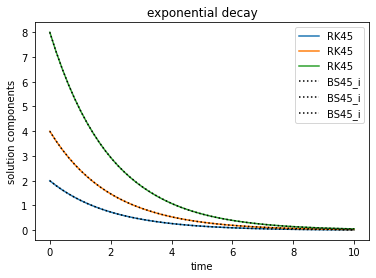

In [3]:
import matplotlib.pyplot as plt

t = np.linspace(*t_span)
plt.plot(t, solutions[0].sol(t).T, label='RK45')
plt.plot(t, solutions[1].sol(t).T, 'k:', label='BS45_i')
plt.legend()
plt.xlabel('time')
plt.ylabel('solution components')
plt.title('exponential decay')
plt.show()

These solutions look similar. The error cannot be seen in this figure.

The analytic solution of this initial value problem is known. This is used to calculate the error at the last time step.

In [4]:
def sol_analytic(t, y0): return y0*np.exp(-0.5*t)

u = sol_analytic(t_span[-1], y0)
errors = [np.linalg.norm(u - sol.y.T[-1]) for sol in solutions]

Now the two methods can be compared for their number of steps, the number of derivative evaluations and the error norms. 

This gives the following table:

In [5]:
print('method  nsteps  nfev  error_norm')
for method, sol, err in zip(methods, solutions, errors):
    name = method if isinstance(method, str) else method.__name__
    print(f'{name:6}  {sol.t.size:^6}  {sol.nfev:^4}   {err:.3e}')

method  nsteps  nfev  error_norm
RK45      8      44    1.462e-04
BS45_i    6      37    3.700e-04


The BS45_i solver needs fewer function evaluations, but the RK45 solver is more accurate for default tolerance values. Setting the same tolerance does not mean that you get the same error!

So which solver is more efficient? 

Solving for different tolerance values and plotting error versus function evaluations answers this question.

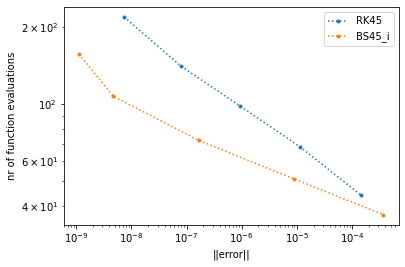

In [6]:
tols = np.logspace(-7, -3, 5)
for method in methods:
    e = []
    n = []
    for tol in tols:
        sol = solve_ivp(exponential_decay, t_span, y0,
                        rtol=tol, atol=tol/1e3, method=method)
        err = u - sol.y.T[-1]
        e.append(np.linalg.norm(err))
        n.append(sol.nfev)
    name = method if isinstance(method, str) else method.__name__
    plt.loglog(e, n, '.:', label=name)
plt.xlabel('||error||')
plt.ylabel('nr of function evaluations')
plt.legend()
plt.show()

The left bottom corner is optimal: low error and few evaluations.

This plot shows that the BS45_i method is more efficient than the RK45 method; roughly a  especially for lower tolerance values.

For high (default) tolerance values BS45_i had a larger error than RK45 (in the table above). The plot shows that this is reversed for the lower tolerance values.

This is the result for just one initial value problem. The RK45 method may be more efficient for other problems. Still these advantages of BS45_i (high efficiency at moderate tolerances) are quite typical.